In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [36]:
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("Spotify-2000.csv")

In [3]:
data.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [4]:
data['Top Genre'].value_counts()

Top Genre
album rock           413
adult standards      123
dutch pop             88
alternative rock      86
dance pop             83
                    ... 
streektaal             1
indie anthem-folk      1
la pop                 1
ccm                    1
bebop                  1
Name: count, Length: 149, dtype: int64

In [5]:
data.iloc[1,:]

Index                               2
Title                     Black Night
Artist                    Deep Purple
Top Genre                  album rock
Year                             2000
Beats Per Minute (BPM)            135
Energy                             79
Danceability                       50
Loudness (dB)                     -11
Liveness                           17
Valence                            81
Length (Duration)                 207
Acousticness                       17
Speechiness                         7
Popularity                         39
Name: 1, dtype: object

In [6]:
data.shape[0]

1994

### Data Exploratory

In [7]:
data.isna().sum()

Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [8]:
data.duplicated().value_counts()

False    1994
Name: count, dtype: int64

In [9]:
data.dtypes

Index                      int64
Title                     object
Artist                    object
Top Genre                 object
Year                       int64
Beats Per Minute (BPM)     int64
Energy                     int64
Danceability               int64
Loudness (dB)              int64
Liveness                   int64
Valence                    int64
Length (Duration)         object
Acousticness               int64
Speechiness                int64
Popularity                 int64
dtype: object

In [16]:
# Supposons que la durée soit en secondes et sans caractères spéciaux
data['Length (Duration)'] = pd.to_numeric(data['Length (Duration)'], errors='coerce')

In [23]:
data['Length (Duration)'] = data['Length (Duration)'].fillna(0).astype(int)

In [24]:
data.describe()

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,997.500000,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,259.839519,28.858074,4.994985,59.52658
std,575.762538,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,81.953031,29.011986,4.401566,14.35160
min,1.000000,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,0.000000,0.000000,2.000000,11.00000
25%,499.250000,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,212.000000,3.000000,3.000000,49.25000
50%,997.500000,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,245.000000,18.000000,4.000000,62.00000
75%,1495.750000,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,289.000000,50.000000,5.000000,71.00000
max,1994.000000,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,966.000000,99.000000,55.000000,100.00000


In [31]:
numeric_columns = ['Beats Per Minute (BPM)', 'Energy', 'Danceability', 'Loudness (dB)', 
                   'Liveness', 'Valence', 'Length (Duration)', 'Acousticness', 
                   'Speechiness', 'Popularity', 'Year']

In [32]:
text_columns = ['Title', 'Artist', 'Top Genre']

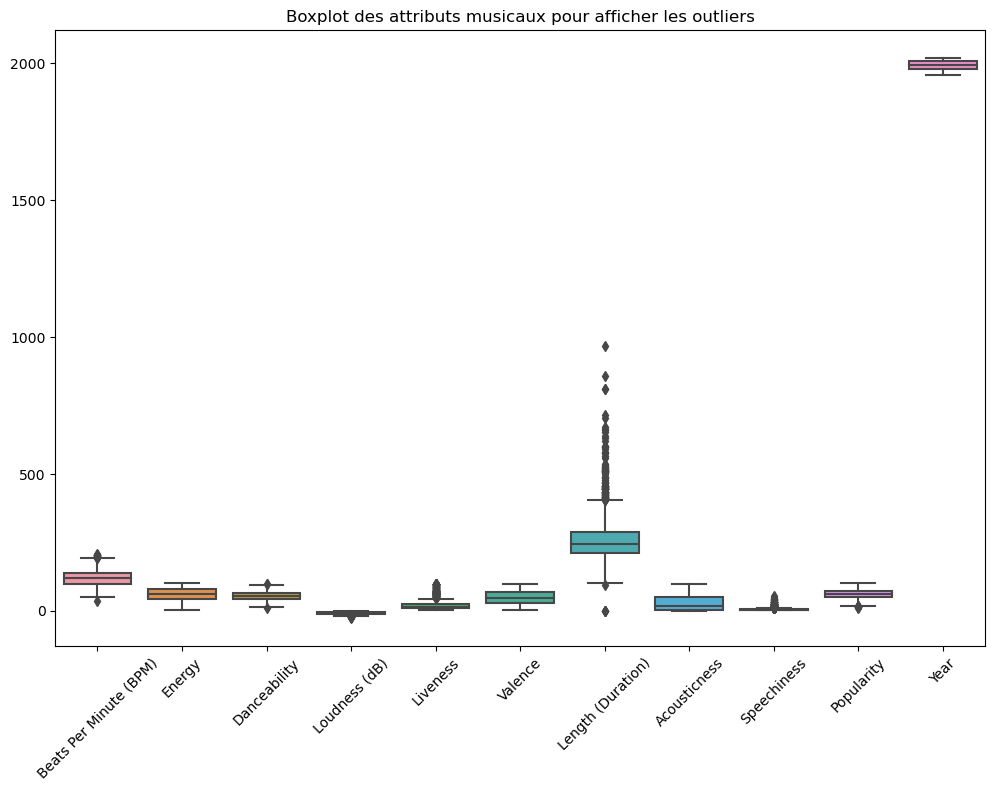

In [33]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[numeric_columns])
plt.title('Boxplot des attributs musicaux pour afficher les outliers')
plt.xticks(rotation=45)
plt.show()

In [34]:
data['Beats Per Minute (BPM)'].unique()

array([157, 135, 168, 173, 106,  99, 102, 137, 148, 112, 109, 124, 117,
       133, 123, 127,  87,  74, 138, 142,  96, 130, 154, 146, 181,  80,
        88, 122, 119, 156, 152,  72, 118, 105, 186, 100, 115,  75, 131,
        76, 108, 194,  90, 149,  92, 132,  86, 166, 176, 103, 136,  81,
        77, 171, 183, 178, 139, 101, 110, 104, 159, 160,  83,  79, 120,
       145, 128,  61, 162,  93, 107, 177,  94,  68, 129, 193,  85, 125,
       126, 165,  58,  91,  89, 141, 121,  97,  98, 190, 164, 114, 170,
       147, 180, 116, 144,  70, 174,  95, 179, 113, 169, 111, 175, 184,
        73, 150, 134,  67, 143, 205,  78, 140, 151,  82, 153, 182, 172,
       199, 155,  84,  71, 167, 161,  49, 189, 158, 163,  69, 198, 197,
       203,  60,  37,  64, 200, 188, 204, 196, 191, 185, 206,  54,  66,
        65,  63], dtype=int64)

In [28]:
gmin_values = data[numeric_columns].min()
max_values = data[numeric_columns].max()

In [29]:
min_max_values = pd.DataFrame({
    'Min': min_values,
    'Max': max_values
})

print(min_max_values)

                        Min  Max
Beats Per Minute (BPM)   37  206
Energy                    3  100
Danceability             10   96
Loudness (dB)           -27   -2
Liveness                  2   99
Valence                   3   99
Length (Duration)         0  966
Acousticness              0   99
Speechiness               2   55
Popularity               11  100


### Data preparation

#### Normalisation des données

In [35]:
data_numeric = data[numeric_columns]
data_text = data[text_columns]

In [37]:
#normaliser les données numériques
scaler = StandardScaler()
data_numeric_scaled = scaler.fit_transform(data_numeric)

In [38]:
# Convertir le résultat en DataFrame pour une manipulation plus facile
data_numeric_scaled = pd.DataFrame(data_numeric_scaled, columns=numeric_columns)

In [43]:
from sklearn.preprocessing import OneHotEncoder

In [45]:
# Appliquer le one-hot encoding aux colonnes textuelles
encoder = OneHotEncoder(sparse_output=False)
data_text_encoded = encoder.fit_transform(data_text)
data_text_encoded = pd.DataFrame(data_text_encoded, columns=encoder.get_feature_names_out(text_columns))

In [46]:
# Combiner les colonnes numériques normalisées et les colonnes textuelles encodées
df_final = pd.concat([data_numeric_scaled, data_text_encoded], axis=1)

# Afficher le DataFrame final
df_final.head()

,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,...,Top Genre_reggae,Top Genre_reggae fusion,Top Genre_rock-and-roll,Top Genre_scottish singer-songwriter,Top Genre_soft rock,Top Genre_stomp and holler,Top Genre_streektaal,Top Genre_trance,Top Genre_uk pop,Top Genre_yacht rock
0,1.312739,-1.340009,-0.015521,-1.368667,-0.479098,0.748080,-0.718146,2.245908,-0.453358,0.799653,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.527616,0.872304,-0.210991,-0.546064,-0.120314,1.271177,-0.644915,-0.408833,0.455637,-1.430623,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.705301,0.420812,0.831514,0.002338,-0.718286,0.104268,0.990578,-0.925990,2.728126,0.660261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.883738,1.639841,-0.667086,1.373342,-0.957475,-0.499305,0.111805,-0.994944,-0.226109,1.148133,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.507320,1.007752,0.310261,1.099141,-0.538895,1.512607,-0.046862,-0.960467,-0.453358,-0.036701,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
from sklearn.decomposition import PCA
# Appliquer le PCA pour réduire les dimensions
pca = PCA(n_components=2)  # Réduire à 2 dimensions pour la visualisation
df_pca = pca.fit_transform(df_final)

In [53]:
from sklearn.cluster import KMeans
# Appliquer KMeans
kmeans = KMeans(n_clusters=5, random_state=42)  
kmeans.fit(df_pca)

KMeans(n_clusters=5, random_state=42)

In [54]:
data['Cluster'] = kmeans.labels_

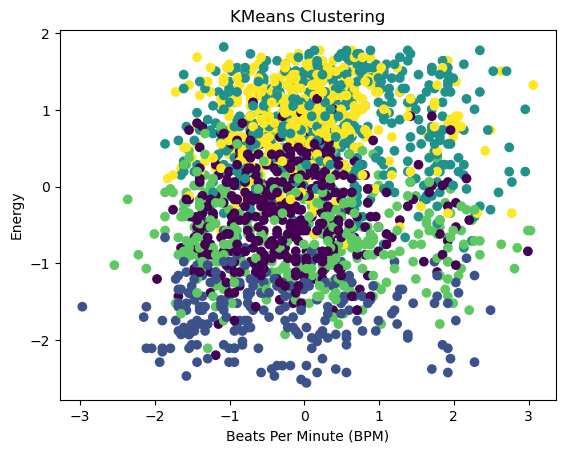

In [55]:
# Optionnel : Visualiser les résultats 
plt.scatter(data_numeric_scaled.iloc[:, 0], data_numeric_scaled.iloc[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel(numeric_columns[0])
plt.ylabel(numeric_columns[1])
plt.title('KMeans Clustering')
plt.show()